# Parcial 1


####librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy import optimize

##1.

Descargue el JSON con la lista de paises: 

import requests
r=requests.get("https://api.worldbank.org/v2/country?format=json&quot;)
countries=r.json()

y escoja aleatoriamente un país


Use los diferentes API endpoints de inspire-hep 


https://inspirehep.net/


 para extraer la lista de investigadores de una institución de ese país  en esa base de datos. 


Para ello:

A) Use el API de institutions para extraer la lista de instituciones del país, por ejemplo: colombia
https://inspirehep.net/api/institutions?q=colombia


Para la primera institución con

number_of_papers > 0


Obtenga el valor

legacy_ICN:


Por ejemplo: 
Colombia, U. Natl.


Si ninguna institución satisface la condición number_of_papers > 0, escoja de nuevo otro país aleatorio y repita el proceso

B) Con el API de literatura obtenga el JSON con los artículos de menos de 10 autores usando el "legacy_ICN" de la siguiente manera

https://inspirehep.net/api/literature?sort=mostrecent&page=1&q=aff+Colombia,+U.+Natl.+and+ac+1->+10


aff: usa el valor de legacy_ICN
and: es un operador lógico
ac: establece los autores entre 1 y 10

C) Para al menos dos artículos de esa institución, extraiga el URL del perfil de cada autor de esa institución que se encuentra dentro del campo "authors" en "record" y luego en "$ref". Por ejemplo

https://inspirehep.net/api/authors/1010271


D) Con cada uno de los datos del resultado del API para cada perfil construya una tabla con los siguientes columnas: 
Nombre Completo
Correo electrònico
posición más reciente (la primera  que aparece en la lista "positions" del JSON) con su correspondiente:
rango 
institución 
fecha de inicio 
fecha de finalización

###a.

In [543]:
r=pd.read_json('https://datahub.io/core/country-list/r/data.json')

In [604]:
i=0; j = 0
while j < 1:
  np.random.seed()
  pais = np.random.choice(r.Name)
  r1=pd.read_json(f'https://inspirehep.net/api/institutions?q={pais}')
  while i<len(r1.hits['hits']):
    if r1.hits['hits'][i]['metadata'].get('number_of_papers') > 0:
      L_ICN = r1.hits['hits'][0]['metadata'].get('legacy_ICN')
      print(r1.hits['hits'][0]['metadata'].get('legacy_ICN'))
      j=1
      break
      break
    else: 
      i+=1
      #if i == len(r1.hits['hits']) - 1:
       #j = 1
    #InvalidURL: URL can't contain control characters. '/api/institutions?q=Saint Martin (French part)' (found at least ' ')

Montenegro U.


###b.

In [ ]:
import requests                                                                                                                                                      
person = requests.get(f'https://inspirehep.net/api/literature?sort=mostrecent&page=1&q={L_ICN}+and+ac+1->+10') 
#djf=pd.read_json(f'https://inspirehep.net/api/literature?sort=mostrecent&page=1&q={L_ICN}+and+ac+1->+10')

###c.

In [605]:
j=0
cantidad = len(person.json()['hits']['hits'][0].get('metadata')['authors'])  
list=[] 
while j<cantidad:                                                                          
  authors = person.json()['hits']['hits'][0].get('metadata')['authors'][j]['record'].get('$ref')#['metadata']['authors']                                                                                                                     
  print(authors)
  list.append(authors)
  j+=1

https://inspirehep.net/api/authors/1032460
https://inspirehep.net/api/authors/1001922
https://inspirehep.net/api/authors/2027479
https://inspirehep.net/api/authors/1065451
https://inspirehep.net/api/authors/2120246
https://inspirehep.net/api/authors/1020280
https://inspirehep.net/api/authors/1001753


###d.

In [606]:
#print(list)
listalterna = ['https://inspirehep.net/api/authors/982776']
dic = {'name':[],'correo':[],'inicio':[],'final':[],'rango':[],'institucion':[]}
for i in list:
  autor = requests.get(i)
  #print(['nombre', autor.json()['metadata']['name'].get('value')])
  dic['name'].append(autor.json()['metadata']['name'].get('value'))
  if "email_addresses" in autor.json()['metadata']:
    #print('1')
    dic['correo'].append(autor.json()['metadata'].get('email_addresses')[0].get('value'))
  else: dic['correo'].append('none')
  if "potitions" in autor.json()['metadata']:
    if "end_date" in autor.json()['metadata']['positions'][0]:
      dic['final'].append(autor.json().get('updated'))
  else:
    dic['final'].append('Active')
  
  if "positions" in autor.json()['metadata']:
    dic['inicio'].append(autor.json()['metadata']['positions'][0].get('start_date'))
    dic['rango'].append(autor.json()['metadata']['positions'][0].get('rank'))
    dic['institucion'].append(autor.json()['metadata'].get('positions')[0].get('institution'))
  else: 
    dic['inicio'].append('none')
    dic['rango'].append('none')
    dic['institucion'].append('none')

print(dic)


{'name': ['Lastovicka-Medin, Gordana', 'Kramberger, Gregor', 'Rebarz, Mateusz', 'Andreasson, Jakob J.', 'Kropielnicki, K.', 'Lastovicka, Tomas', 'Kroll, I. Joseph Ira'], 'correo': ['medin@ifh.de', 'gregor.kramberger@ijs.si', 'none', 'jakoba@xray.bmc.uu.se', 'none', 'none', 'kroll@hep.upenn.edu'], 'inicio': [None, None, 'none', None, 'none', None, '1997'], 'final': ['Active', 'Active', 'Active', 'Active', 'Active', 'Active', 'Active'], 'rango': [None, None, 'none', None, 'none', 'PHD', 'SENIOR'], 'institucion': ['Aachen, Tech. Hochsch.', 'Stefan Inst., Ljubljana', 'none', 'Uppsala U.', 'none', 'Humboldt U., Berlin', 'Pennsylvania U.']}


In [607]:
dt = pd.DataFrame(data=dic)
dt

,name,correo,inicio,final,rango,institucion
0,"Lastovicka-Medin, Gordana",medin@ifh.de,None,Active,None,"Aachen, Tech. Hochsch."
1,"Kramberger, Gregor",gregor.kramberger@ijs.si,None,Active,None,"Stefan Inst., Ljubljana"
2,"Rebarz, Mateusz",none,none,Active,none,none
3,"Andreasson, Jakob J.",jakoba@xray.bmc.uu.se,None,Active,None,Uppsala U.
4,"Kropielnicki, K.",none,none,Active,none,none
5,"Lastovicka, Tomas",none,None,Active,PHD,"Humboldt U., Berlin"
6,"Kroll, I. Joseph Ira",kroll@hep.upenn.edu,1997,Active,SENIOR,Pennsylvania U.


Nota: los valores que no pertenezcan al los Json arrojan errores

##2.


A) Genere un polinomio de numpy con 3 raices reales aleatorias entre los dos últimos números diferentes de su identificación (Ejemplo: 98554575 → 3 raices reales aleatorias  entre 5 y 7 )\
B) Encuentre los puntos críticos del polinomio: las raices de la derivada el polinomio.\
C) Con alguna de los métodos para encontrar mínimos compruebe que el punto crítico de menor (mayor) valor corresponde al mínimo (máximo) global del polinomio.\
D) Grafique el polinomío inclueyendo los puntos asociados a las raices.

###a.

In [608]:
l = [5,6,7]
R = []
i=0
while i < 3:
  num=(np.random.random(1)+np.random.choice([5,6]))[0]
  R.append(num)
  i+=1
p=np.poly1d(R,r=True)
print(f'El polinomio con raices aleatoria es:\n{p}')

El polinomio con raices aleatoria es:
   3         2
1 x - 18.18 x + 109.8 x - 220.1


###b.

In [ ]:
pde= p.deriv()
pdde = pde.deriv()
pde,pdde
'''lr = []
for i in pde.roots.real:
  lr.append(i)'''
lr = pde.roots.real
i=np.sort(lr)[0]
print(f'los puntos criticos son {lr}')

los puntos criticos son [6.61770122 5.50956281]


###c.

In [ ]:
dic={} #diccionario vacío para ingresar los datos de los valores asociados a las raíces

for i in range(len(lr)):
    dic[p(lr[i])] = [lr[i]]

l=np.sort(p(lr)) #Ordena los valores asociados a las raíces de menor a mayor para usar el método optimize en ese punto y verificar

min= optimize.fmin_powell(p, dic.get(l[0]), disp=False) #Búsqueda del mínimo y máximo al rededor del punto encontrado.
max= optimize.fmin_powell(-p, dic.get(l[-1]), disp=False)
print('Mínimo global {} corresponde al maximo de los puntos criticos  {}' .format(dic.get(l[0]),min))
print('Máximo global {} corresponde al minimo de los puntos criticos  {}' .format(dic.get(l[-1]),max))

Mínimo global [6.617701217683306] corresponde al maximo de los puntos criticos  [6.61770124]
Máximo global [5.509562806937025] corresponde al minimo de los puntos criticos  [5.50956283]


###d.

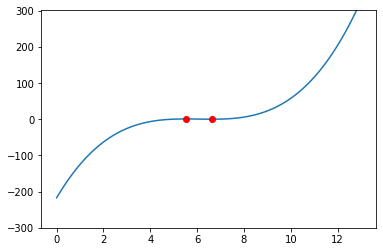

In [ ]:
from numpy.core.function_base import linspace
X=linspace(0,13,100)
#print(X, len(X))
plt.plot(X,p(X))
plt.plot(lr,p(lr),'ro')
plt.ylim(l[0]-300,l[-1]+300)
plt.show()